In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,NaN,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0.0,NaN,NaN,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0.0,1.00000,NaN,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,NaN,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	36
float64		column 3	36
float64		column 4	54
float64		column 5	19
float64		column 6	0
float64		column 7	0
float64		column 8	0
float64		column 9	0
float64		column 10	18
float64		column 11	19
float64		column 12	36
float64		column 13	0
float64		column 14	0
float64		column 15	36
float64		column 16	18
float64		column 17	37
float64		column 18	0
float64		column 19	0
float64		column 20	18
float64		column 21	37
float64		column 22	19
float64		column 23	0
float64		column 24	0
float64		column 25	19
float64		column 26	0
float64		column 27	18
float64		column 28	0
float64		column 29	0
float64		column 30	73
float64		column 31	37
float64		column 32	36
float64		column 33	0
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,315.0,315.000000,297.000000,332.000000,351.000000,351.000000,351.000000,351.000000,333.000000,...,332.000000,351.000000,333.000000,351.000000,351.000000,278.000000,314.000000,315.000000,351.000000,333.000000
mean,0.891738,0.0,0.645210,0.042504,0.604517,0.115889,0.550095,0.119360,0.511848,0.188809,...,0.401730,-0.071187,0.553590,-0.069538,0.378445,-0.015427,0.358481,0.010113,0.349364,0.005739
std,0.311155,0.0,0.485176,0.414502,0.515738,0.460810,0.492654,0.520750,0.507066,0.476455,...,0.572107,0.508495,0.499745,0.550025,0.575886,0.472291,0.555139,0.503453,0.522663,0.462080
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.476530,-0.043880,0.426700,-0.024795,0.211310,-0.054840,0.087110,-0.044380,...,0.000000,-0.332390,0.329300,-0.443165,0.000000,-0.207365,0.000000,-0.225480,0.000000,-0.181820
50%,1.000000,0.0,0.862840,0.017090,0.808620,0.022800,0.728730,0.014710,0.684210,0.023040,...,0.549175,-0.015050,0.708820,-0.017690,0.496640,0.000000,0.446875,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.174980,1.000000,0.334655,0.969240,0.445675,0.953240,0.538190,...,0.910373,0.156765,0.998420,0.153535,0.883465,0.097890,0.834285,0.200120,0.813765,0.166450
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

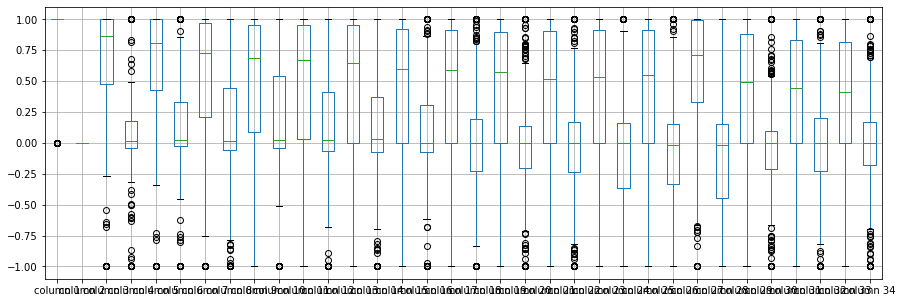

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.645210
column 4     0.042504
column 5     0.604517
column 6     0.115889
column 7     0.550095
column 8     0.119360
column 9     0.511848
column 10    0.188809
column 11    0.477867
column 12    0.143874
column 13    0.400801
column 14    0.093414
column 15    0.367797
column 16    0.073140
column 17    0.386644
column 18   -0.003617
column 19    0.359390
column 20   -0.011654
column 21    0.356813
column 22    0.004663
column 23    0.362475
column 24   -0.057406
column 25    0.401730
column 26   -0.071187
column 27    0.553590
column 28   -0.069538
column 29    0.378445
column 30   -0.015427
column 31    0.358481
column 32    0.010113
column 33    0.349364
column 34    0.005739
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.284444,0.061431,0.107140,0.127606,0.221867,0.027079,0.189242,-0.057486,...,-0.002278,0.149789,-0.228103,-0.010725,0.133632,-0.130707,0.165438,-0.125299,0.162962,0.047187
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.284444,NaN,1.000000,0.093411,0.483028,-0.035294,0.412508,0.047564,0.453476,0.035873,...,0.221653,-0.032916,-0.013900,0.129747,0.338732,0.105475,0.202555,-0.084154,0.248878,-0.002168
column 4,0.061431,NaN,0.093411,1.000000,-0.035983,-0.109072,0.008950,0.144591,-0.331246,0.157576,...,-0.148568,-0.224114,-0.137810,-0.106501,-0.084231,0.178398,-0.204423,-0.165504,-0.123857,-0.027489
column 5,0.107140,NaN,0.483028,-0.035983,1.000000,0.014154,0.600180,-0.075250,0.456880,-0.047681,...,0.218831,-0.027674,0.137861,0.158717,0.263173,0.121814,0.418274,-0.045639,0.372672,-0.127351
column 6,0.127606,NaN,-0.035294,-0.109072,0.014154,1.000000,-0.010227,0.274747,-0.120712,0.217105,...,-0.171690,0.041787,-0.184995,-0.068775,-0.029392,-0.069914,-0.128238,0.294745,0.016899,0.189654
column 7,0.221867,NaN,0.412508,0.008950,0.600180,-0.010227,1.000000,-0.150424,0.461889,-0.111001,...,0.275561,0.087734,0.057653,0.109391,0.300632,0.049092,0.458702,0.007022,0.545881,-0.076368
column 8,0.027079,NaN,0.047564,0.144591,-0.075250,0.274747,-0.150424,1.000000,-0.336013,0.374498,...,-0.189116,-0.133023,-0.263769,0.072373,-0.139725,0.110045,-0.150004,0.119295,-0.200860,0.374913
column 9,0.189242,NaN,0.453476,-0.331246,0.456880,-0.120712,0.461889,-0.336013,1.000000,-0.260416,...,0.339353,0.107478,0.186511,0.146817,0.329813,-0.038154,0.346408,-0.069887,0.344814,-0.106871
column 10,-0.057486,NaN,0.035873,0.157576,-0.047681,0.217105,-0.111001,0.374498,-0.260416,1.000000,...,-0.254104,-0.035208,-0.279212,0.044517,-0.131733,0.018396,-0.137305,-0.001619,-0.213571,0.069397


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+32,34+32+32,34+32+32+32,34+32+32+32+32,34+32+32+32,34+32+32,34+32,34], vae_layer = False, seed = 320)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.2824642544701
Epoch: 1 , loss: 19.328276861281623
Epoch: 2 , loss: 19.226687840053014
Epoch: 3 , loss: 19.25788942972819
Epoch: 4 , loss: 19.038822174072266
Epoch: 5 , loss: 19.022375470116025
Epoch: 6 , loss: 18.77200140271868
Epoch: 7 , loss: 18.89814803713844
Epoch: 8 , loss: 18.83340108962286
Epoch: 9 , loss: 18.541028567722865
Epoch: 10 , loss: 18.00609965551467
Epoch: 11 , loss: 17.39752760387602
Epoch: 12 , loss: 16.804197901771182
Epoch: 13 , loss: 16.753519966488792
Epoch: 14 , loss: 16.616513025192987
Epoch: 15 , loss: 16.532199450901576
Epoch: 16 , loss: 16.605398132687522
Epoch: 17 , loss: 16.57714471362886
Epoch: 18 , loss: 16.51553653535389
Epoch: 19 , loss: 16.653611864362443
Epoch: 20 , loss: 16.431079864501953
Epoch: 21 , loss: 16.543711526053293
Epoch: 22 , loss: 16.510733014061337
Epoch: 23 , loss: 16.488330477759952
Epoch: 24 , loss: 16.3111115864345
Epoch: 25 , loss: 16.59267761

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -0.074258
column 16    0.014328
column 17   -1.000000
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.000180,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,-0.363317,0.001971,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.000000,0.000000,0.452886,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0,0.001883,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

13.812041384041757

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.20175295395074747

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.765014
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    0.667426
column 22    0.093532
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.025376
column 31    0.563125
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0.000000,0.995390,-0.058890,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,-0.000180,1.000000,-0.188290,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0.000000,0.636683,-0.031679,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0.000000,1.000000,0.001276,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0.000000,1.000000,-0.024010,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.000000,0.835080,0.082980,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.000000,0.951130,0.004190,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.001883,0.947010,-0.000340,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.000000,0.906080,-0.016570,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NL_5(imp).xlsx", index=False, header=False)